In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
# preprocess data
y = train['label']
X = train.drop(columns=['label'])

# normalize the images to values between 0 and 1
X = X / 255.0
test = test / 255.0

# one-hot encode the labels
y = to_categorical(y, num_classes=10)

In [5]:
print("Dimensions before PCA: ", X.shape)

# use PCA for dimensionlity reduction
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
test_pca = pca.transform(test)

print("Dimensions after PCA: ", X_pca.shape)

Dimensions before PCA:  (42000, 784)
Dimensions after PCA:  (42000, 154)


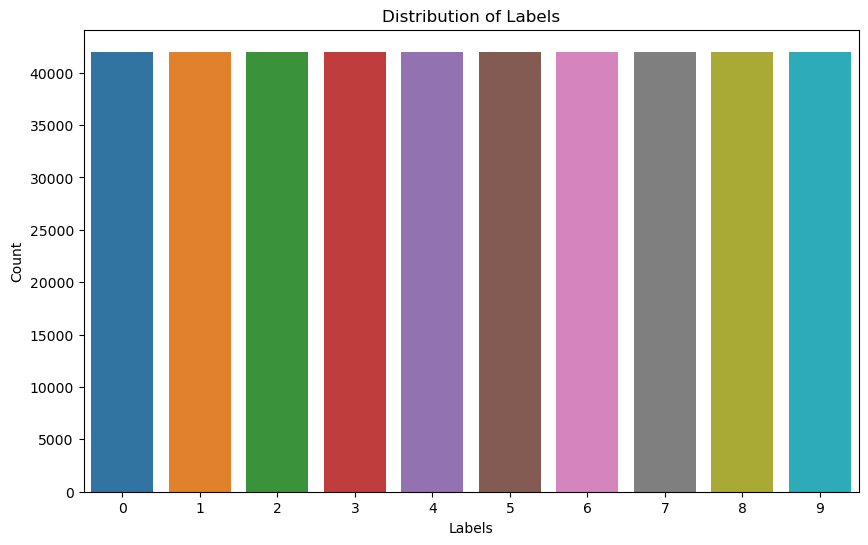

In [6]:
# examine the distribution of the labels
plt.figure(figsize=(10, 6))
sns.countplot(y)
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

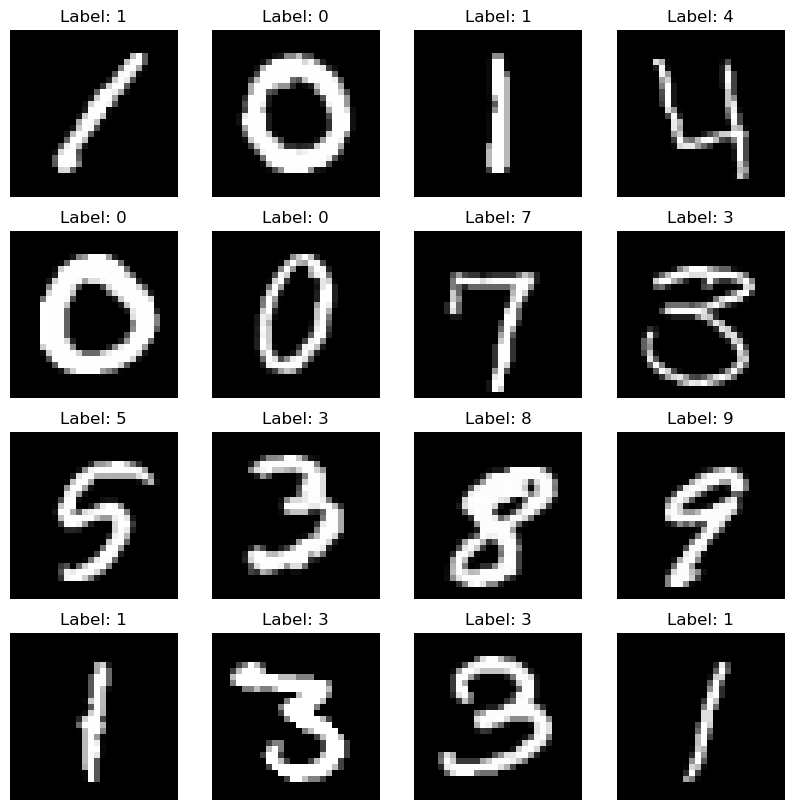

In [7]:
# plot some of the images
import matplotlib.pyplot as plt

# convert data to numpy arrays
train_data = train.values[:, 1:]
train_labels = train.values[:, 0]
test_data = test.values

rows, columns = 4, 4
fig, ax = plt.subplots(rows, columns, figsize=(10, 10))

for i in range(rows):
    for j in range(columns):
        index = i*columns + j
        image = train_data[index].reshape((28, 28))
        ax[i][j].imshow(image, cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(f"Label: {train_labels[index]}")

plt.show()

In [8]:
# split into a stratified 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [9]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# apply best threshold
selector = VarianceThreshold(0.065)
X_train_vt = selector.fit_transform(X_train)
X_test_vt = selector.transform(X_test)
test_vt = selector.transform(test)
print(X_train_vt.shape)

(33600, 310)


In [10]:
# apply pca to reduced set
pca.fit(X_train_vt)
X_train_vtpca = pca.transform(X_train_vt)
X_test_vtpca = pca.transform(X_test_vt)
test_vtpca = pca.transform(test_vt)
print(X_train_vtpca.shape)

(33600, 108)


In [11]:
# fit model with best hyperparameters for the reduced then decomposed set
best_svm = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
best_svm.fit(X_train_vtpca, y_train)
y_pred = best_svm.predict(test_vtpca)

In [12]:
# Read the sample_submission.csv file
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

# Replace the second column (Label) with the predictions
sample_submission['Label'] = y_pred

# Write the updated DataFrame to a new CSV file, submission.csv
sample_submission.to_csv('submission.csv', index=False)